In [1]:
import pandas as pd

In [2]:
scores = pd.read_csv("scores.csv")

In [3]:
scores.head()

,source,reference,translation,z-score,avg-score,annotators
0,В этом году крымчане получат уведомление на оп...,This year the Crimeans will receive a notice f...,"This year, residents of Crimea will receive a ...",0.878043,92.0,1
1,Энергетические компании находятся под давление...,Energy companies are under pressure due to low...,Energy companies are under pressure from lower...,0.511473,81.5,2
2,В бархатный сезон покупают туры в основном оди...,"In the velvet season, tours are mostly single ...","In the autumn season, tours are mainly purchas...",0.947866,94.0,1
3,Возле него на всякий случай стоит познавательн...,"Near him, just in case, there is a cognitive t...","Beside it, for good measure, there is an infor...",1.052601,97.0,1
4,Действительно ли Эфиопия находится на грани ра...,Is Ethiopia on the verge of schism?,Is Ethiopia about to crack?,0.738397,88.0,1


In [4]:
scores['source'][4]

'Действительно ли Эфиопия находится на грани раскола?'

In [5]:
scores['translation'][4]

'Is Ethiopia about to crack?'

In [6]:
scores['reference'][4]

'Is Ethiopia on the verge of schism?'

In [7]:
len(scores)

17980

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
scores['z-score'].sort_values(ascending=False)

4924     1.917702
8840     1.749679
10284    1.733018
16979    1.733018
11065    1.733018
           ...   
7514    -6.413770
6831    -6.428480
5733    -6.673922
4741    -8.623684
3776    -8.623684
Name: z-score, Length: 17980, dtype: float64

In [10]:
scores['avg-score'].sort_values(ascending=False)

12741    100.0
1946     100.0
8569     100.0
4714     100.0
1937     100.0
         ...  
10652      0.0
5367       0.0
14254      0.0
2774       0.0
9835       0.0
Name: avg-score, Length: 17980, dtype: float64

In [11]:
scores['word_count']  = scores['reference'].apply(lambda x: len(str(x).split(" ")))
scores[['reference','word_count']].head()

,reference,word_count
0,This year the Crimeans will receive a notice f...,14
1,Energy companies are under pressure due to low...,33
2,"In the velvet season, tours are mostly single ...",11
3,"Near him, just in case, there is a cognitive t...",27
4,Is Ethiopia on the verge of schism?,7


In [12]:
scores.word_count.describe()

count    17980.000000
mean        21.025473
std         10.656383
min          1.000000
25%         13.000000
50%         19.000000
75%         27.000000
max        200.000000
Name: word_count, dtype: float64

In [13]:
all_words = ' '.join(scores['reference']).split()

# Count all words 
freq = pd.Series(all_words).value_counts()

freq

the              32079
of               17896
to                9728
in                9390
and               8207
                 ...  
shark-most           1
her,'                1
witnesses,           1
"smekalochku"        1
“dear                1
Length: 27844, dtype: int64

## Text Preprocessing

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

In [15]:
scores['reference'][2]

'In the velvet season, tours are mostly single travelers and couples.'

In [16]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
def preprocessing(dataframe):
    processed_corpus = []
    #stop_words = set(stopwords.words())
    for i in tqdm(range(len(dataframe))):
        text = dataframe['reference'][i]
        
        #Remove punctuations
        ## Ask me to explain this regular expression if you dont get it
        #text = re.sub('[^A-z]', ' ', text) 

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        #text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        processed_corpus.append(text)
    return processed_corpus

In [18]:
def preprocessing1(dataframe):
    processed_corpus = []
    #stop_words = set(stopwords.words())
    for i in tqdm(range(len(dataframe))):
        text = dataframe['translation'][i]
        
        #Remove punctuations
        ## Ask me to explain this regular expression if you dont get it
        #text = re.sub('[^A-z]', ' ', text) 

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        #text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        processed_corpus.append(text)
    return processed_corpus

In [19]:
references = preprocessing(scores)

<ipython-input-17-a29e331a436c>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(dataframe))):


  0%|          | 0/17980 [00:00<?, ?it/s]

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [20]:
translation = preprocessing1(scores)

<ipython-input-18-e4707227c27d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(dataframe))):


  0%|          | 0/17980 [00:00<?, ?it/s]

In [21]:
references[4]

'is ethiopia on the verge of schism?'

In [22]:
scores['reference'][4]

'Is Ethiopia on the verge of schism?'

## Bag-of-Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_df=0.8,
    stop_words="english", 
    max_features=10000, 
    ngram_range=(1,3)
)

In [24]:
X = cv.fit_transform(references)

In [25]:
list(cv.vocabulary_.keys())[:10]

['year',
 'receive',
 'notice',
 'payment',
 'transport',
 'tax',
 'receive notice',
 'payment transport',
 'transport tax',
 'payment transport tax']

In [26]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [27]:
top_df = get_top_n_grams(references, top_k=20, n=1)
top_df.head(10)

,Ngram,Freq
0,the,35637
1,of,18012
2,in,10724
3,to,9879
4,and,8595
5,that,4408
6,is,4125
7,on,3997
8,for,3623
9,it,3022


In [28]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

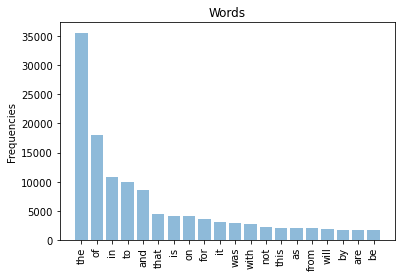

In [29]:
plot_frequencies(top_df)

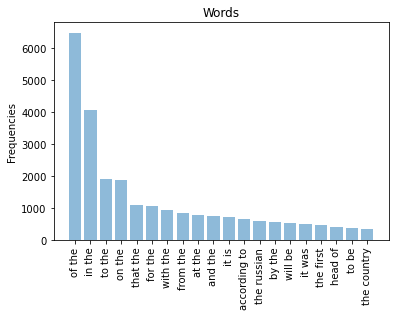

In [30]:
top_df = get_top_n_grams(references, top_k=20, n=2)
plot_frequencies(top_df)

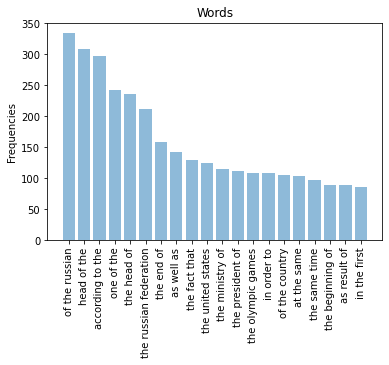

In [31]:
top_df = get_top_n_grams(references, top_k=20, n=3)
plot_frequencies(top_df)

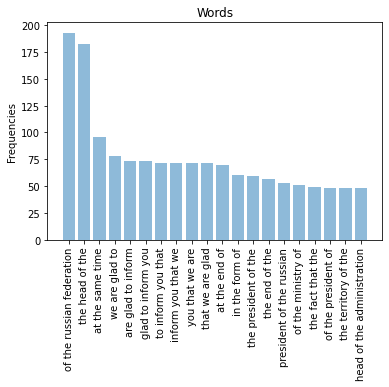

In [32]:
top_df = get_top_n_grams(references, top_k=20, n=4)
plot_frequencies(top_df)

# Rouge

In [33]:
from rouge import Rouge

In [34]:
model_out = translation[4]

ref_out = references[4]

In [35]:
rouge = Rouge()

In [36]:
rouge.get_scores(model_out, ref_out)

[{'rouge-1': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857},
  'rouge-2': {'f': 0.1999999952000001, 'p': 0.25, 'r': 0.16666666666666666},
  'rouge-l': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857}}]

In [37]:
rouge.get_scores(model_out, ref_out, avg=True)

{'rouge-1': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857},
 'rouge-2': {'f': 0.1999999952000001, 'p': 0.25, 'r': 0.16666666666666666},
 'rouge-l': {'f': 0.33333332847222225, 'p': 0.4, 'r': 0.2857142857142857}}

In [38]:
references[4]

'is ethiopia on the verge of schism?'

# chrf_score

In [39]:
import nltk.translate.chrf_score as chrf

In [40]:
a = translation[4].split()
b = references[4].split()

In [41]:
print(chrf.sentence_chrf(a, b))
print(chrf.sentence_chrf(translation[4], references[4]))

0.39355200651404104
0.39355200651404104


In [42]:
chrf.corpus_chrf([translation[4]], [references[4]])

0.39355200651404104

In [43]:
chrf.chrf_precision_recall_fscore_support(a, b,n=1)

(0.2857142857142857, 0.4, 0.38461538461538464, 2)

In [44]:
# https://www.nltk.org/_modules/nltk/translate/chrf_score.html

from collections import Counter, defaultdict
import re

from nltk.util import ngrams


def sentence_chrf(
    reference, hypothesis, min_len=1, max_len=6, beta=3.0, ignore_whitespace=True
):
   
    return corpus_chrf(
        [reference],
        [hypothesis],
        min_len,
        max_len,
        beta=beta,
        ignore_whitespace=ignore_whitespace,
    )



def _preprocess(sent, ignore_whitespace):
    if type(sent) != str:
        # turn list of tokens into a string
        sent = " ".join(sent)

    if ignore_whitespace:
        sent = re.sub(r"\s+", "", sent)
    return sent


def chrf_precision_recall_fscore_support(
    reference, hypothesis, n, beta=3.0, epsilon=1e-16
):
  
    ref_ngrams = Counter(ngrams(reference, n))
    hyp_ngrams = Counter(ngrams(hypothesis, n))

    # calculate the number of ngram matches
    overlap_ngrams = ref_ngrams & hyp_ngrams
    tp = sum(overlap_ngrams.values())  # True positives.
    tpfp = sum(hyp_ngrams.values())  # True positives + False positives.
    tpfn = sum(ref_ngrams.values())  # True positives + False negatives.

    try:
        prec = tp / tpfp  # precision
        rec = tp / tpfn  # recall
        factor = beta ** 2
        fscore = (1 + factor) * (prec * rec) / (factor * prec + rec)
    except ZeroDivisionError:
        prec = rec = fscore = epsilon
    return prec, rec, fscore, tp



def corpus_chrf(
    references, hypotheses, min_len=1, max_len=6, beta=3.0, ignore_whitespace=True
):
   

    assert len(references) == len(
        hypotheses
    ), "The number of hypotheses and their references should be the same"
    num_sents = len(hypotheses)

    # Keep f-scores for each n-gram order separate
    ngram_fscores = defaultdict(lambda: list())

    # Iterate through each hypothesis and their corresponding references.
    for reference, hypothesis in zip(references, hypotheses):

        # preprocess both reference and hypothesis
        reference = _preprocess(reference, ignore_whitespace)
        hypothesis = _preprocess(hypothesis, ignore_whitespace)

        # Calculate f-scores for each sentence and for each n-gram order
        # separately.
        for n in range(min_len, max_len + 1):
            # Compute the precision, recall, fscore and support.
            prec, rec, fscore, tp = chrf_precision_recall_fscore_support(
                reference, hypothesis, n, beta=beta
            )
            ngram_fscores[n].append(fscore)

    # how many n-gram sizes
    num_ngram_sizes = len(ngram_fscores)

    # sum of f-scores over all sentences for each n-gram order
    total_scores = [sum(fscores) for n, fscores in ngram_fscores.items()]

    # macro-average over n-gram orders and over all sentences
    return (sum(total_scores) / num_ngram_sizes) / num_sents

In [45]:
sentence_chrf([translation[4]], [references[4]])

0.39355200651404104

In [46]:
chrf_precision_recall_fscore_support(translation[4], references[4], n=1)

(0.5714285714285714, 0.7407407407407407, 0.7194244604316548, 20)

# GLEU

In [47]:
import nltk
import nltk.translate.gleu_score as gleu

import numpy
import os

try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')

In [48]:
hyp = str(translation[4]).split()
ref_a = str(references[4]).split()

In [49]:
ref_a

['is', 'ethiopia', 'on', 'the', 'verge', 'of', 'schism?']

In [50]:
score_ref_a = gleu.sentence_gleu([ref_a], hyp)
print("Hyp and ref_a are the same: {}".format(score_ref_a))

Hyp and ref_a are the same: 0.13636363636363635


In [51]:
score_ref_a = gleu.corpus_gleu([[ref_a]], [hyp])
print("1 document with 1 reference sentence: {}".format(score_ref_a))

1 document with 1 reference sentence: 0.13636363636363635


In [52]:
score_1to4grams = gleu.sentence_gleu([ref_a], hyp, min_len=1, max_len=4)
score_1to2grams = gleu.sentence_gleu([ref_a], hyp, min_len=1, max_len=2)
print("1 to 4 grams: {}".format(score_1to4grams))
print("1 to 2 grams: {}".format(score_1to2grams))

1 to 4 grams: 0.13636363636363635
1 to 2 grams: 0.23076923076923078


# Meteor

In [53]:
import nltk.translate.meteor_score as meteor
meteor.meteor_score([translation[4]], references[4])

0.3605769230769231

# Correlation

In [54]:
chf = []
for i in range(len(translation)):
    a = chrf.sentence_chrf([translation[i]], references[i])
    chf.append(a)

In [55]:
gleu1 = []
for i in range(len(translation)):
    a = gleu.sentence_gleu([str(references[i]).split()], str(translation[i]).split(), min_len=1, max_len=2)
    gleu1.append(a)

In [56]:
meteor1 = []
for i in range(len(translation)):
    a = (meteor.meteor_score([translation[i]], references[i]))
    meteor1.append(a)

In [57]:
from pprint import pprint
pprint(meteor1)

[0.48449914316871784,
 0.6184908415469519,
 0.5859375000000001,
 0.35990753112341206,
 0.3605769230769231,
 0.6016332152695789,
 0.5563616071428571,
 0.6470025700794931,
 0.5431672250139586,
 0.625,
 0.5613772455089819,
 0.26785714285714285,
 0.5681818181818182,
 0.831151832460733,
 0.7361111111111112,
 0.6579764121663563,
 0.29283625730994156,
 0.6881754609027336,
 0.49064577397910736,
 0.7698369753728755,
 0.775090283026791,
 0.6225,
 0.8289915966386556,
 0.8479570840681953,
 0.3005826271186441,
 0.3948576675849403,
 0.7806389313591373,
 0.2709227467811159,
 0.8702348864073931,
 0.7219907407407408,
 0.625,
 0.39718663979019014,
 0.8203389830508474,
 0.8203389830508474,
 0.7555879494655003,
 0.5616982623981389,
 0.4873015873015873,
 0.9004696531791906,
 0.8091657715717866,
 0.1834862385321101,
 0.5714710971765351,
 0.8402875320168554,
 0.9435348243799656,
 0.45299145299145305,
 0.6743777056277056,
 0.5742821473158551,
 0.5245403946702648,
 0.6160910087719299,
 0.5011235955056179,
 0.7

 0.35731132075471694,
 0.6592502045524,
 0.6103595304521767,
 0.4000000000000001,
 0.5775154004106776,
 0.6722910294338867,
 0.4041014168530947,
 0.5962605117194489,
 0.6800326497296194,
 0.7254381058911261,
 0.5859375,
 0.9489474396396744,
 0.7097122302158273,
 0.1694915254237288,
 0.7398275988019579,
 0.5515361360171571,
 0.6289424860853432,
 0.534957627118644,
 0.6803513071895425,
 0.5362036083039218,
 0.06410256410256411,
 0.3872945267341041,
 0.561875,
 0.3493764492072445,
 0.614134304226385,
 0.56747552149851,
 0.39062499999999994,
 0.4834784592570059,
 0.35493827160493824,
 0.6828543619691616,
 0.3054794520547945,
 0.3995069033530573,
 0.5824150596877871,
 0.5968217352300398,
 0.5798500142391545,
 0.38470400377229086,
 0.548559670781893,
 0.7799930383663368,
 0.6706184889414704,
 0.4958545918367347,
 0.27530864197530863,
 0.4983240223463687,
 0.5409071180555556,
 0.5186046511627908,
 0.8287608596250572,
 0.5319148936170213,
 0.883633851970336,
 0.781013103747022,
 0.591856441619

 0.8224705152079456,
 0.21341463414634146,
 0.6156657881526104,
 0.748263888888889,
 0.5190697674418605,
 0.43698395388689826,
 0.17731741573033705,
 0.6871727748691099,
 0.412087912087912,
 0.16260162601626016,
 0.4955947136563876,
 0.3177966101694915,
 0.4227272727272727,
 0.44894428359579125,
 0.43512195121951225,
 0.7309228039041704,
 0.868875893437297,
 0.39789789789789787,
 0.5719504841627354,
 0.7129277566539924,
 0.31746031746031744,
 0.9990234375,
 0.5480852402296139,
 0.47355561943087093,
 0.7687074829931974,
 0.746691131498471,
 0.4254092261904763,
 0.5067567567567567,
 0.8706405332028428,
 0.3993055555555555,
 0.6126582278481013,
 0.7626904539800996,
 0.7473484848484849,
 0.26595744680851063,
 0.7078410311493017,
 0.17342032967032966,
 0.47767380027630785,
 0.7535245503159941,
 0.5089447463768116,
 0.594315245478036,
 0.4308873720136518,
 0.5245159932659933,
 0.5897435897435898,
 0.5781938325991189,
 0.7320235583684951,
 0.6488817570955772,
 0.75625,
 0.45515574650913,
 0.6

 0.7126275677806492,
 0.5376344086021505,
 0.4793074324324324,
 0.6048387096774195,
 0.3005952380952382,
 0.7059558517284465,
 0.39347799535887307,
 0.36250614145643306,
 0.1461038961038961,
 0.6744604316546763,
 0.7145055922290248,
 0.678394582985324,
 0.24096385542168677,
 0.4911494755244756,
 0.7403818751781134,
 0.418248694826768,
 0.619776417354272,
 0.19607843137254904,
 0.37733529990167164,
 0.715702479338843,
 0.6771339952649256,
 0.7200590762620838,
 0.6428433641975309,
 0.49287251210328137,
 0.63871723844023,
 0.5496742671009772,
 0.5120627456032983,
 0.6691244239631337,
 0.740358126721763,
 0.7077707672692798,
 0.5320785984848485,
 0.5667811679127096,
 0.65599173553719,
 0.5008993771477663,
 0.5956517655897822,
 0.7015960230245945,
 0.6418233268001903,
 0.5281690140845071,
 0.6796201863900124,
 0.6439691027926322,
 0.6879444303355448,
 0.5327215285091018,
 0.4664508205872501,
 0.63010101010101,
 0.46504838171504836,
 0.5511876881900302,
 0.8098501215230893,
 0.53517701333868

 0.27034750800182905,
 0.7111954931681659,
 0.48478260869565215,
 0.8392805651672433,
 0.49512307151927815,
 0.663404706144753,
 0.5060506050605059,
 0.5950875925591476,
 0.5514705882352942,
 0.6954520089285714,
 0.6497091590259291,
 0.7957957957957958,
 0.44393460709091814,
 0.5545924355657756,
 0.5338078291814946,
 0.509070200294469,
 0.6275446652661325,
 0.5618079062928933,
 0.46046046046046046,
 0.8294209702660407,
 0.8249141034031413,
 0.556799402953249,
 0.42825838414634143,
 0.7176562806192437,
 0.3494990892531876,
 0.5471748277615943,
 0.4444444444444444,
 0.1773049645390071,
 0.5888888888888889,
 0.2293577981651376,
 0.3125,
 0.41471048513302033,
 0.5710659898477157,
 0.2716049382716049,
 0.6117254695453749,
 0.7358076187767612,
 0.605515587529976,
 0.40455758275041465,
 0.8304240522080579,
 0.1111111111111111,
 0.6742447835565244,
 0.605,
 0.7482555018786904,
 0.1875,
 0.6999862016537188,
 0.16666666666666666,
 0.6321281103832689,
 0.7120253164556962,
 0.3901611535199322,
 0.

 0.40088383838383845,
 0.6743777056277056,
 0.36770583533173457,
 0.75,
 0.45227963525835874,
 0.5504317111459968,
 0.9985422740524781,
 0.9782608695652174,
 0.6204402515723271,
 0.5764282501124606,
 0.2640845070422535,
 0.2778878541707945,
 0.5839100346020761,
 0.4990583804143125,
 0.7838736007462688,
 0.6914285714285714,
 0.5928571428571429,
 0.7582857142857142,
 0.7913056930693071,
 0.7093444018731375,
 0.2298850574712644,
 0.5409413367890876,
 0.23023023023023023,
 0.13761467889908252,
 0.748263888888889,
 0.33189033189033185,
 0.4413728391497348,
 0.5196078431372549,
 0.072992700729927,
 0.23537037037037034,
 0.4238809405086111,
 0.5010893246187365,
 0.6378877532723687,
 0.574195927165466,
 0.5679012345679012,
 0.08620689655172413,
 0.3194444444444444,
 0.6217370208636583,
 0.4560673701298701,
 0.7117028270874425,
 0.9995,
 0.07936507936507937,
 0.6208609271523178,
 0.7267441860465118,
 0.6060606060606061,
 0.09615384615384616,
 0.5657327586206896,
 0.7524784954074938,
 0.48523206

In [58]:
scores['chf'] = chf
scores['gleu'] = gleu1
scores['meteor'] = meteor1
scores

,source,reference,translation,z-score,avg-score,annotators,word_count,chf,gleu,meteor
0,В этом году крымчане получат уведомление на оп...,This year the Crimeans will receive a notice f...,"This year, residents of Crimea will receive a ...",0.878043,92.0,1,14,0.612153,0.370370,0.484499
1,Энергетические компании находятся под давление...,Energy companies are under pressure due to low...,Energy companies are under pressure from lower...,0.511473,81.5,2,33,0.653892,0.384615,0.618491
2,В бархатный сезон покупают туры в основном оди...,"In the velvet season, tours are mostly single ...","In the autumn season, tours are mainly purchas...",0.947866,94.0,1,11,0.421129,0.360000,0.585938
3,Возле него на всякий случай стоит познавательн...,"Near him, just in case, there is a cognitive t...","Beside it, for good measure, there is an infor...",1.052601,97.0,1,27,0.594053,0.309091,0.359908
4,Действительно ли Эфиопия находится на грани ра...,Is Ethiopia on the verge of schism?,Is Ethiopia about to crack?,0.738397,88.0,1,7,0.393552,0.230769,0.360577
...,...,...,...,...,...,...,...,...,...,...
17975,"""Придется перестраиваться"", - говорит имам Бур...","""will have to be rebuilt,"" says Imam of Burnae...","‘We're going to have to change our ways’, says...",-0.886087,20.0,1,12,0.477743,0.322581,0.406855
17976,"Конечно, не все рады успеху Дженнер.","Of course, not everyone is happy with the succ...","Of course, not everyone is pleased about Jenne...",0.977529,93.0,1,11,0.595811,0.428571,0.526087
17977,"Новинка приестся, и использование будет ослабе...",The new pall and use will weaken over time.,The novelty will wear off and use will subside...,-0.333892,72.0,1,9,0.345944,0.260870,0.320513
17978,Подробнее о выборе нового генподрядчика читайт...,For more information about selecting a new con...,For more information about the choice of the n...,-1.839682,11.0,1,14,0.480865,0.266667,0.339367


In [62]:
scores['z-score'].corr(scores['chf'])

0.312443135186631

In [60]:
scores['z-score'].corr(scores['gleu'])

0.3329897647850572

In [61]:
 scores['z-score'].corr(scores['meteor'])

0.33615999572055916